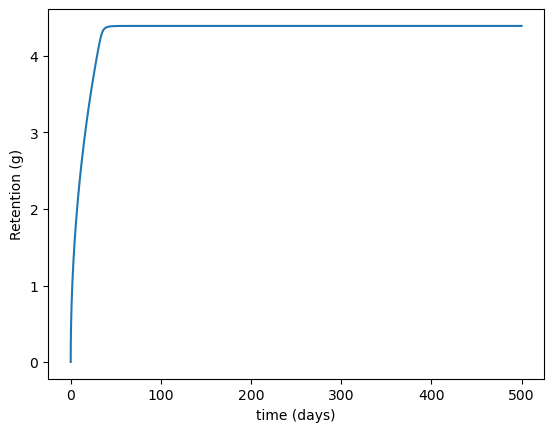

In [2]:
from scipy.constants import Avogadro
import numpy as np
import matplotlib.pyplot as plt
folder = "div_sec_1_1perc_full"

csv_data = np.genfromtxt(fname = folder+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)

retention = (np.array(csv_data[:,1])
    +np.array(csv_data[:,2])
    +np.array(csv_data[:,3])
    +np.array(csv_data[:,4])
    +np.array(csv_data[:,5])
    )

plt.plot(csv_data[:,0]/24/3600, retention[:]/Avogadro/2*3)
plt.xlabel("time (days)")
plt.ylabel("Retention (g)")
plt.show()

225


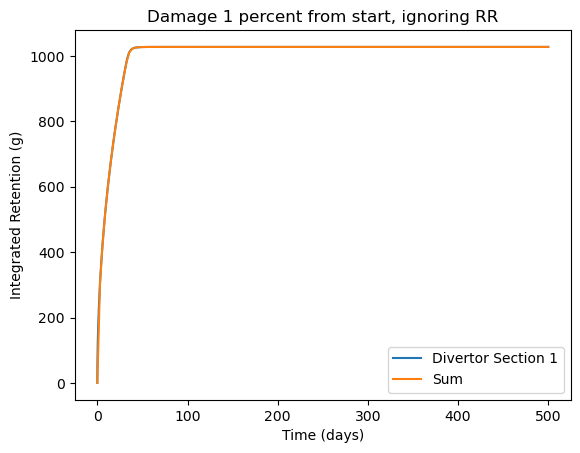

1027.50008351939 =retention


ValueError: x and y must have same first dimension, but have shapes (170,) and (145,)

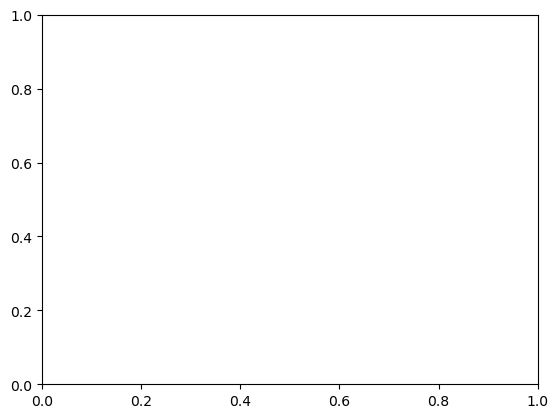

In [3]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

common_time = np.linspace(0, 500*3600*24, 170)
labels = ["Divertor Section 1"]#, "Divertor Section 2", "OFW", "IFW", "Limiters"]
folders = ["div_sec_1_1perc_full"]#, "div_sec_2_1perc_full", "ofw_1perc_full", "ifw_1perc_full", "limiter_1perc_full"]
section_areas = [233.93, 124.48, 331, 120, 102.6]

plt.figure()
full_data_1perc = np.zeros(170)
for i in range(len(folders)):
    if folders[i] != "limiter_1perc_full":
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          +np.array(csv_data[:,5])
          )
    else:
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          )       
    
    retention = retention*section_areas[i]
    reten_interp = interp1d(csv_data[:,0], retention, kind = 'linear', fill_value = 'extrapolate')
    reten_temp =reten_interp(common_time)
    full_data_1perc=full_data_1perc + reten_temp
    plt.plot(csv_data[:,0]/24/3600, retention[:]/Avogadro/2*3, label = labels[i])

plt.plot(common_time/24/3600, full_data_1perc/Avogadro/2*3, label = "Sum")
plt.xlabel("Time (days)")
plt.ylabel("Integrated Retention (g)")
plt.title("Damage 1 percent from start, ignoring RR")
plt.legend()
plt.show()
print(full_data_1perc[-1]/Avogadro/2*3, "=retention")
def straight_line(x,m,c):
    return m*x+c

plt.plot(common_time/24/3600, full_data_1perc[25:]/Avogadro/2*3)

consts, uncert = curve_fit(straight_line, common_time[:25]/24/3600, full_data_1perc[:25]/Avogadro/2*3, p0=[2e-4,1])

gradient = consts[0]
print(consts[0], consts[1])

consts, uncert = curve_fit(straight_line, common_time[25:]/24/3600, full_data_1perc[25:]/Avogadro/2*3)

gradient = consts[0]
print(consts[0], consts[1])
plt.plot(common_time[25:]/24/3600, common_time[25:]/24/3600*consts[0]+consts[1])


230
3669
169
169
169


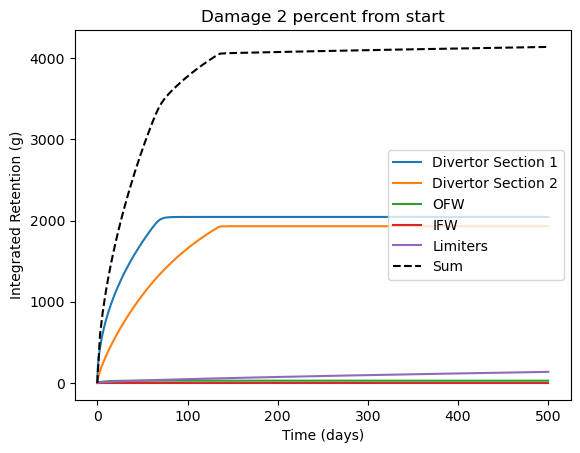

4138.501408457352 =retention
168
417
168
168
168
2144.9735223022085 =retention


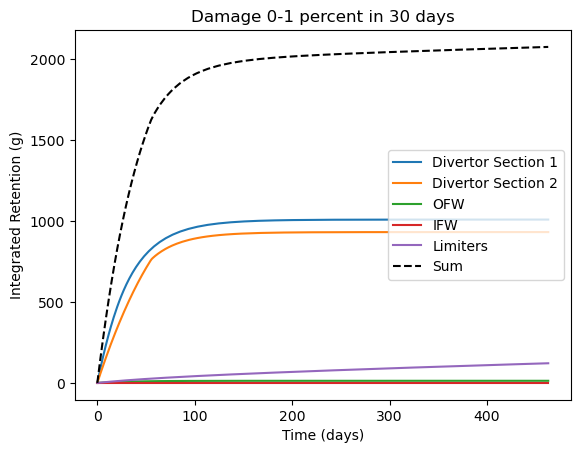

225
1447
169
169
169
2146.282390399593 =retention


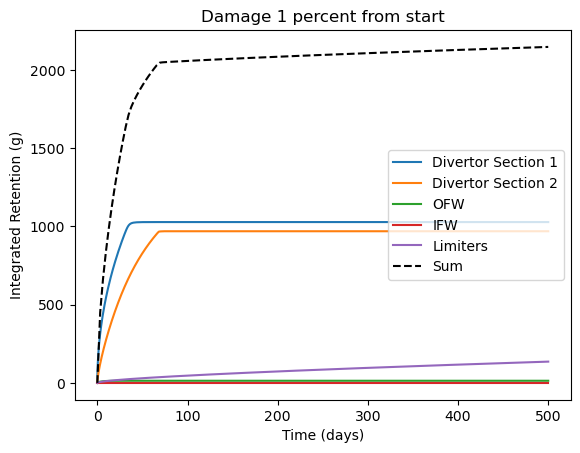

In [16]:
common_time = np.linspace(0, 500*3600*24, 170)
labels = ["Divertor Section 1", "Divertor Section 2", "OFW", "IFW", "Limiters"]
folders = ["div_sec_1_2perc_full", "div_sec_2_2perc_full", "ofw_2perc_full", "ifw_2perc_full", "limiter_2perc_full"]
section_areas = [233.93, 124.48, 331, 120, 102.6]

plt.figure()
full_data_2perc = np.zeros(170)
for i in range(len(folders)):
    if folders[i] != "limiter_2perc_full":
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          +np.array(csv_data[:,5])
          )
    else:
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          )       
    
    retention = retention*section_areas[i]
    reten_interp = interp1d(csv_data[:,0], retention, kind = 'linear', fill_value = 'extrapolate')
    reten_temp =reten_interp(common_time)
    full_data_2perc=full_data_2perc + reten_temp
    plt.plot(csv_data[:,0]/24/3600, retention[:]/Avogadro/2*3, label = labels[i])

plt.plot(common_time/24/3600, full_data_2perc/Avogadro/2*3, color = 'black', linestyle = 'dashed',label = "Sum")
plt.xlabel("Time (days)")
plt.ylabel("Integrated Retention (g)")
plt.title("Damage 2 percent from start")
plt.legend()
plt.show()
print(full_data_2perc[-1]/Avogadro/2*3, "=retention")
from scipy.interpolate import interp1d

common_time = np.linspace(0, 4e7, 160)
labels = ["Divertor Section 1", "Divertor Section 2", "OFW", "IFW", "Limiters"]
folders = ["div_sec_1_1perc_start_full", "div_sec_2_1perc_start_full", "ofw_1perc_start_full", "ifw_1perc_start_full", "limiter_1perc_start_full"]
section_areas = [233.93, 124.48, 331, 120, 102.6]

plt.figure()
full_data_vary = np.zeros(160)
for i in range(len(folders)):
    if folders[i] != "limiter_1perc_start_full":
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          +np.array(csv_data[:,5])
          )
    else:
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          )       
    
    retention = retention*section_areas[i]
    reten_interp = interp1d(csv_data[:,0], retention, kind = 'linear', fill_value = 'extrapolate')
    reten_temp =reten_interp(common_time)
    full_data_vary=full_data_vary + reten_temp
    plt.plot(csv_data[:,0]/24/3600, retention[:]/Avogadro/2*3, label = labels[i])

plt.plot(common_time/24/3600, full_data_vary/Avogadro/2*3, color = 'black', linestyle = 'dashed',label = "Sum")
plt.xlabel("Time (days)")
plt.ylabel("Integrated Retention (g)")
plt.legend()
plt.title("Damage 0-1 percent in 30 days")
print(full_data_1perc[-1]/Avogadro/2*3, "=retention")
plt.show()


common_time = np.linspace(0, 500*3600*24, 160)
labels = ["Divertor Section 1", "Divertor Section 2", "OFW", "IFW", "Limiters"]
folders = ["div_sec_1_1perc_full", "div_sec_2_1perc_full", "ofw_1perc_full", "ifw_1perc_full", "limiter_1perc_full"]
section_areas = [233.93, 124.48, 331, 120, 102.6]

plt.figure()
full_data_1perc = np.zeros(160)
for i in range(len(folders)):
    if folders[i] != "limiter_1perc_full":
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          +np.array(csv_data[:,5])
          )
    else:
        csv_data = np.genfromtxt(fname = folders[i]+"/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
        print(len(csv_data))
        retention = (
            np.array(csv_data[:,1])
          +np.array(csv_data[:,2])
          +np.array(csv_data[:,3])
          +np.array(csv_data[:,4])
          )       
    
    retention = retention*section_areas[i]
    reten_interp = interp1d(csv_data[:,0], retention, kind = 'linear', fill_value = 'extrapolate')
    reten_temp =reten_interp(common_time)
    full_data_1perc=full_data_1perc + reten_temp
    plt.plot(csv_data[:,0]/24/3600, retention[:]/Avogadro/2*3, label = labels[i])

plt.plot(common_time/24/3600, full_data_1perc/Avogadro/2*3, color = 'black', linestyle = 'dashed',label = "Sum")
plt.xlabel("Time (days)")
plt.ylabel("Integrated Retention (g)")

plt.legend()
plt.title("Damage 1 percent from start")
print(full_data_1perc[-1]/Avogadro/2*3, "=retention")
plt.show()


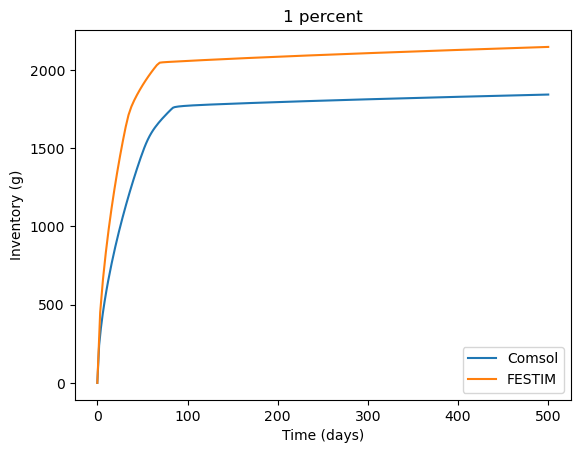

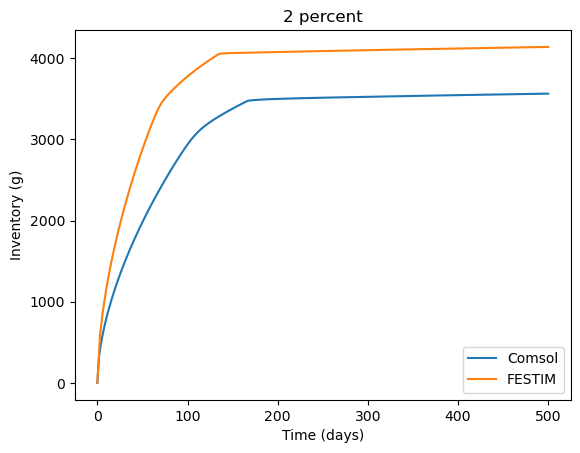

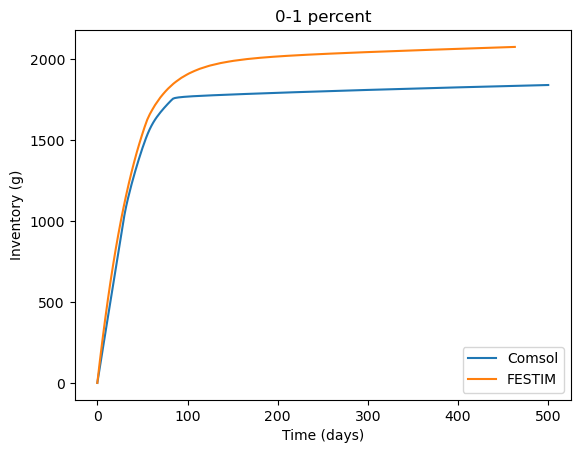

In [17]:
comsol_data = np.genfromtxt(fname="comsol_data/1_percent.csv", delimiter = ',', skip_header=True, dtype='float')
#old_data = np.genfromtxt(fname="old_1perc.txt", dtype = "float")
plt.plot(comsol_data[:,0], comsol_data[:,6], label = 'Comsol')
plt.plot(common_time/24/3600, full_data_1perc/Avogadro/2*3, label = 'FESTIM')
#plt.plot(common_time/24/3600, old_data[:160]/Avogadro/2*3, label='less precise festim')
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Inventory (g)")
plt.title("1 percent")
plt.show()

common_time = np.linspace(0, 500*3600*24, 170)
comsol_data_2 = np.genfromtxt(fname="comsol_data/2_perc.csv", delimiter = ',', skip_header=True, dtype='float')
plt.plot(comsol_data_2[:,0], comsol_data_2[:,6], label = 'Comsol')
plt.plot(common_time/24/3600, full_data_2perc/Avogadro/2*3, label = 'FESTIM')
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Inventory (g)")
plt.title("2 percent")
plt.show()

common_time = np.linspace(0, 4e7, 160)
comsol_data_3 = np.genfromtxt(fname="comsol_data/30_day_vary.csv", delimiter = ',', skip_header=True, dtype='float')
#old_data_vary = np.genfromtxt("old_vary_sum.txt", dtype='float')
plt.plot(comsol_data_3[:,0], comsol_data_3[:,6], label = 'Comsol')
plt.plot(common_time/24/3600, full_data_vary/Avogadro/2*3, label = 'FESTIM')
#plt.plot(common_time/24/3600,old_data_vary, label = "old")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Inventory (g)")
plt.title("0-1 percent")
plt.show()




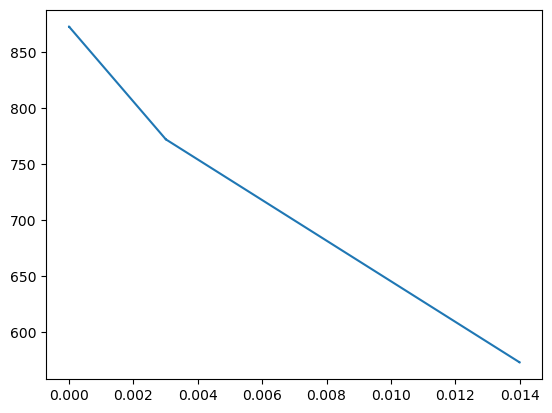

In [ ]:
temperature_data = np.genfromtxt(fname = "div_sec_1_1perc_full/temp.txt", dtype = 'float', delimiter = ',', skip_header = True)
plt.plot(temperature_data[:,0], temperature_data[:,1])

NameError: name 'comsol_data_3' is not defined

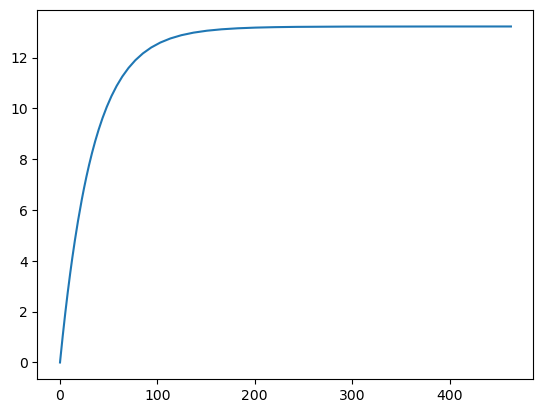

In [8]:
data = np.genfromtxt(fname = "ofw_1perc_start_full/derived_qs.csv", dtype = 'float', delimiter = ',', skip_header = True)
retention = (np.array(data[:,1])
    +np.array(data[:,2])
    +np.array(data[:,3])
    +np.array(data[:,4])
    +np.array(data[:,5])
    )     
retention = retention*331
plt.plot(data[:,0]/24/3600, retention/Avogadro/2*3)
plt.plot(comsol_data_3[:,0], comsol_data_3[:,4], label = 'Comsol')
plt.legend()
plt.show()